http://actionrecognition.net/files/dsetdetail.php?did=15;
https://github.com/epic-kitchens/annotations

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from childes_mi.utils.paths import DATA_DIR, ensure_dir, EPIC_KITCHENS_DIR
import urllib.request

In [8]:
from tqdm.autonotebook import tqdm

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [9]:
import pandas as pd

In [10]:
actions_data = pd.read_csv(EPIC_KITCHENS_DIR / 'EPIC_train_action_labels.csv')

In [14]:
pd.read_csv(EPIC_KITCHENS_DIR / 'EPIC_train_action_labels.csv')

,uid,participant_id,video_id,narration,start_timestamp,stop_timestamp,start_frame,stop_frame,verb,verb_class,noun,noun_class,all_nouns,all_noun_classes
0,0,P01,P01_01,open door,00:00:00.14,00:00:03.37,8,202,open,2,door,8,['door'],[8]
1,1,P01,P01_01,turn on light,00:00:04.37,00:00:06.17,262,370,turn-on,12,light,113,['light'],[113]
2,2,P01,P01_01,close door,00:00:06.98,00:00:09.49,418,569,close,3,door,8,['door'],[8]
3,3,P01,P01_01,open fridge,00:00:12.77,00:00:13.99,766,839,open,2,fridge,10,['fridge'],[10]
4,4,P01,P01_01,take celery,00:00:15.25,00:00:16.40,915,983,take,0,celery,185,['celery'],[185]
5,5,P01,P01_01,take container,00:00:16.50,00:00:18.06,990,1083,take,0,container,29,['container'],[29]
6,6,P01,P01_01,take tofu,00:00:18.19,00:00:21.14,1091,1268,take,0,tofu,159,['tofu'],[159]
7,7,P01,P01_01,close fridge,00:00:21.91,00:00:23.33,1314,1399,close,3,fridge,10,['fridge'],[10]
8,8,P01,P01_01,open fridge,00:00:23.18,00:00:24.29,1390,1457,open,2,fridge,10,['fridge'],[10]
9,9,P01,P01_01,take carrots and,00:00:24.48,00:00:27.94,1468,1676,take,0,carrot,40,['carrot'],[40]


In [15]:
actions_data[:3]

,uid,participant_id,video_id,narration,start_timestamp,stop_timestamp,start_frame,stop_frame,verb,verb_class,noun,noun_class,all_nouns,all_noun_classes
0,0,P01,P01_01,open door,00:00:00.14,00:00:03.37,8,202,open,2,door,8,['door'],[8]
1,1,P01,P01_01,turn on light,00:00:04.37,00:00:06.17,262,370,turn-on,12,light,113,['light'],[113]
2,2,P01,P01_01,close door,00:00:06.98,00:00:09.49,418,569,close,3,door,8,['door'],[8]


In [20]:
import numpy as np

In [21]:
len(np.unique(actions_data.verb_class.values))

119

In [22]:
actions_data.participant_id.unique()

array(['P01', 'P02', 'P03', 'P04', 'P05', 'P06', 'P07', 'P08', 'P10',
       'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P19', 'P20', 'P21',
       'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30',
       'P31'], dtype=object)

In [23]:
from tqdm.autonotebook import tqdm

In [24]:
actions = [actions_data[actions_data.video_id == vid].verb_class.values for vid in tqdm(actions_data.video_id.unique())]

In [25]:
actions_name = [[actions_data[actions_data.video_id == vid].verb.values, actions_data[actions_data.video_id == vid].noun.values] for vid in tqdm(actions_data.video_id.unique())]

In [31]:
' '.join([verb +'_'+ noun for verb, noun in zip(actions_name[0][0], actions_name[0][1])])

'open_door turn-on_light close_door open_fridge take_celery take_container take_tofu close_fridge open_fridge take_carrot open_drawer close_fridge put-down_vegetable open_cupboard take_board:cutting put-down_board:cutting close_cupboard open_drawer take_knife take_knife put-down_knife close_drawer put-down_knife open_tap wash_courgette wash_courgette wash_carrot wash_carrot close_tap put-down_vegetable open_cupboard take_grater take_pan put-down_pan close_cupboard close_cupboard take_courgette cut_courgette turn-on_hob cut_courgette cut_courgette dice_courgette dice_courgette dice_courgette dice_courgette pour_courgette throw_courgette open_drawer close_drawer take_spatula stir_courgette take_salt open_salt pour_salt put-down_salt stir_courgette put-down_spatula take_celery wash_celery open_tap wash_celery close_tap put-down_celery cut_celery cut_celery pour_celery put-down_board:cutting take_celery throw_celery open_fridge put_celery close_fridge take_spatula stir_spatula put-down_spa

In [27]:
for verb, noun in zip(actions_name[0][0], actions_name[0][1]):
    print((verb +' '+ noun))

open door
turn-on light
close door
open fridge
take celery
take container
take tofu
close fridge
open fridge
take carrot
open drawer
close fridge
put-down vegetable
open cupboard
take board:cutting
put-down board:cutting
close cupboard
open drawer
take knife
take knife
put-down knife
close drawer
put-down knife
open tap
wash courgette
wash courgette
wash carrot
wash carrot
close tap
put-down vegetable
open cupboard
take grater
take pan
put-down pan
close cupboard
close cupboard
take courgette
cut courgette
turn-on hob
cut courgette
cut courgette
dice courgette
dice courgette
dice courgette
dice courgette
pour courgette
throw courgette
open drawer
close drawer
take spatula
stir courgette
take salt
open salt
pour salt
put-down salt
stir courgette
put-down spatula
take celery
wash celery
open tap
wash celery
close tap
put-down celery
cut celery
cut celery
pour celery
put-down board:cutting
take celery
throw celery
open fridge
put celery
close fridge
take spatula
stir spatula
put-down spat

In [36]:
behav_lens = [len(i) for i in actions]

In [37]:
import matplotlib.pyplot as plt

In [38]:
import numpy as np

### create distribution plot

In [42]:
import seaborn as sns

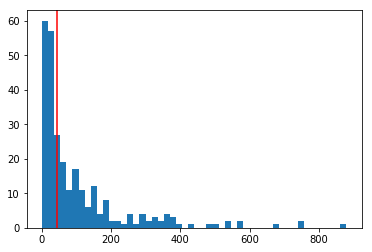

In [43]:
fig, ax = plt.subplots()
ax.hist(behav_lens, bins = 50);
ax.axvline(np.median(behav_lens), color='red')

In [74]:
from childes_mi.utils.paths import DATA_DIR, FIGURE_DIR, ensure_dir
from childes_mi.utils.general import flatten,save_fig

In [75]:
ensure_dir(FIGURE_DIR/ 'distributions')

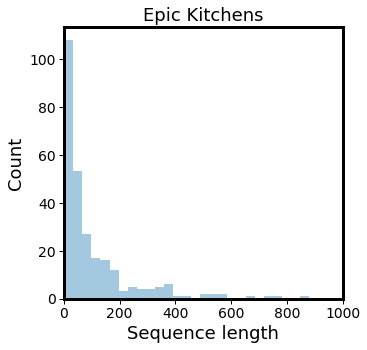

In [81]:
sns.set_context("paper", rc={"font.size":24,"axes.titlesize":18,"axes.labelsize":18})   

fig, ax = plt.subplots(figsize=(5,5));
p = sns.distplot(behav_lens, kde=False, rug=False, ax = ax);
ax.set_xlim([0,1000])
ax.set_xlabel('Sequence length')
ax.set_title('Epic Kitchens')
ax.set_ylabel('Count')
p.tick_params(labelsize=14)
for sp in ax.spines.items():
    sp[1].set_linewidth(3)  
save_fig(FIGURE_DIR/ 'distributions' / 'epic_kitchens_distribution')
plt.show()